In [1]:
import pandas as pd

In [2]:
import json

def parse_json(data):
    j1 = json.loads(data)
    return j1

In [3]:
df = pd.read_csv(r'./Data/test.csv', converters={'device':parse_json, 
                                                 'geoNetwork':parse_json,
                                                 'totals':parse_json, 
                                                 'trafficSource':parse_json},header=0)
df.head()

D:\Program Files\WPy64-3740\python-3.7.4.amd64\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


channelGrouping      date  \
0  Organic Search  20171016   
1  Organic Search  20171016   
2  Organic Search  20171016   
3  Organic Search  20171016   
4  Organic Search  20171016   

                                              device        fullVisitorId  \
0  {'browser': 'Chrome', 'browserVersion': 'not a...  6167871330617112363   
1  {'browser': 'Chrome', 'browserVersion': 'not a...  0643697640977915618   
2  {'browser': 'Chrome', 'browserVersion': 'not a...  6059383810968229466   
3  {'browser': 'Safari', 'browserVersion': 'not a...  2376720078563423631   
4  {'browser': 'Safari', 'browserVersion': 'not a...  2314544520795440038   

                                          geoNetwork  \
0  {'continent': 'Asia', 'subContinent': 'Southea...   
1  {'continent': 'Europe', 'subContinent': 'South...   
2  {'continent': 'Europe', 'subContinent': 'Weste...   
3  {'continent': 'Americas', 'subContinent': 'Nor...   
4  {'continent': 'Americas', 'subContinent': 'Nor...   

                        sessionId  socialEngagementType  \
0  6167871330617112363_1508151024  Not Socially Engaged   
1  0643697640977915618_1508175522  Not Socially Engaged   
2  6059383810968229466_1508143220  Not Socially Engaged   
3  2376720078563423631_1508193530  Not Socially Engaged   
4  2314544520795440038_1508217442  Not Socially Engaged   

                                              totals  \
0     {'visits': '1', 'hits': '4', 'pageviews': '4'}   
1  {'visits': '1', 'hits': '5', 'pageviews': '5',...   
2  {'visits': '1', 'hits': '7', 'pageviews': '7',...   
3  {'visits': '1', 'hits': '8', 'pageviews': '4',...   
4  {'visits': '1', 'hits': '9', 'pageviews': '4',...   

                                       trafficSource     visitId  visitNumber  \
0  {'campaign': '(not set)', 'source': 'google', ...  1508151024            2   
1  {'campaign': '(not set)', 'source': 'google', ...  1508175522            1   
2  {'campaign': '(not set)', 'source': 'google', ...  1508143220            1   
3  {'campaign': '(not set)', 'source': 'google', ...  1508193530            1   
4  {'campaign': '(not set)', 'source': 'google', ...  1508217442            1   

   visitStartTime  
0      1508151024  
1      1508175522  
2      1508143220  
3      1508193530  
4      1508217442

In [4]:
df.describe()

date       visitId    visitNumber  visitStartTime
count  8.046840e+05  8.046840e+05  804684.000000    8.046840e+05
mean   2.017496e+07  1.513339e+09       2.414087    1.513339e+09
std    4.573101e+03  6.676000e+06       9.431737    6.676000e+06
min    2.017080e+07  1.501656e+09       1.000000    1.501657e+09
25%    2.017101e+07  1.507548e+09       1.000000    1.507548e+09
50%    2.017121e+07  1.513125e+09       1.000000    1.513125e+09
75%    2.018022e+07  1.519227e+09       1.000000    1.519227e+09
max    2.018043e+07  1.525158e+09     457.000000    1.525158e+09

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804684 entries, 0 to 804683
Data columns (total 12 columns):
channelGrouping         804684 non-null object
date                    804684 non-null int64
device                  804684 non-null object
fullVisitorId           804684 non-null object
geoNetwork              804684 non-null object
sessionId               804684 non-null object
socialEngagementType    804684 non-null object
totals                  804684 non-null object
trafficSource           804684 non-null object
visitId                 804684 non-null int64
visitNumber             804684 non-null int64
visitStartTime          804684 non-null int64
dtypes: int64(4), object(8)
memory usage: 73.7+ MB


## JSON parse and type transformations

In [6]:
import json
from tqdm import tqdm

def reorganize_json_in_column(df, column_name):
    column_keys = set(df[column_name][0].keys())
    for i in range(len(df)):
        column_keys = column_keys.union(df[column_name][i].keys())
    print(column_keys)    
    
    df[sorted(column_keys)] = df[column_name].apply(pd.Series)[sorted(column_keys)]

In [7]:
col_names = ['totals']


for i in tqdm(range(0, len(col_names))):
    reorganize_json_in_column(df, col_names[i])

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

{'bounces', 'newVisits', 'hits', 'visits', 'pageviews'}


KeyboardInterrupt: 

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [46]:
df = df.drop(columns = ['screenResolution',
                    'screenColors', 
                    'language',
                    'flashVersion',
                    'mobileDeviceMarketingName',
                    'mobileDeviceInfo',
                    'mobileInputSelector',
                    'mobileDeviceModel',
                    'mobileDeviceBranding',
                    'operatingSystemVersion',
                    'browserSize',
                    'browserVersion',
                    'device', 
                    'geoNetwork',
                    'totals',
                    'trafficSource', 
                    'networkLocation',
                    'longitude',
                    'latitude',
                    'socialEngagementType',
                    'adwordsClickInfo',
                    'cityId', 
                    'newVisits',
                    'visits',
                    'campaignCode',
                    'adwordsClickInfo'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 32 columns):
channelGrouping       903653 non-null object
date                  903653 non-null int64
fullVisitorId         903653 non-null object
sessionId             903653 non-null object
visitId               903653 non-null int64
visitNumber           903653 non-null int64
visitStartTime        903653 non-null int64
browser               903653 non-null object
deviceCategory        903653 non-null object
isMobile              903653 non-null bool
operatingSystem       903653 non-null object
city                  903653 non-null object
continent             903653 non-null object
country               903653 non-null object
metro                 903653 non-null object
networkDomain         903653 non-null object
region                903653 non-null object
subContinent          903653 non-null object
bounces               450630 non-null object
hits                  903653 non-null ob

channelGrouping      date        fullVisitorId  \
0  Organic Search  20160902  1131660440785968503   
1  Organic Search  20160902   377306020877927890   
2  Organic Search  20160902  3895546263509774583   
3  Organic Search  20160902  4763447161404445595   
4  Organic Search  20160902    27294437909732085   

                        sessionId     visitId  visitNumber  visitStartTime  \
0  1131660440785968503_1472830385  1472830385            1      1472830385   
1   377306020877927890_1472880147  1472880147            1      1472880147   
2  3895546263509774583_1472865386  1472865386            1      1472865386   
3  4763447161404445595_1472881213  1472881213            1      1472881213   
4    27294437909732085_1472822600  1472822600            2      1472822600   

      browser deviceCategory  isMobile  ... transactionRevenue visits  \
0      Chrome        desktop     False  ...                NaN      1   
1     Firefox        desktop     False  ...                NaN      1   
2      Chrome        desktop     False  ...                NaN      1   
3  UC Browser        desktop     False  ...                NaN      1   
4      Chrome         mobile      True  ...                NaN      1   

  adContent   campaign campaignCode isTrueDirect          keyword   medium  \
0       NaN  (not set)          NaN          NaN   (not provided)  organic   
1       NaN  (not set)          NaN          NaN   (not provided)  organic   
2       NaN  (not set)          NaN          NaN   (not provided)  organic   
3       NaN  (not set)          NaN          NaN  google + online  organic   
4       NaN  (not set)          NaN         True   (not provided)  organic   

  referralPath  source  
0          NaN  google  
1          NaN  google  
2          NaN  google  
3          NaN  google  
4          NaN  google  

[5 rows x 32 columns]

In [47]:
df['transactionRevenue'] = df['transactionRevenue'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 32 columns):
channelGrouping       903653 non-null object
date                  903653 non-null int64
fullVisitorId         903653 non-null object
sessionId             903653 non-null object
visitId               903653 non-null int64
visitNumber           903653 non-null int64
visitStartTime        903653 non-null int64
browser               903653 non-null object
deviceCategory        903653 non-null object
isMobile              903653 non-null bool
operatingSystem       903653 non-null object
city                  903653 non-null object
continent             903653 non-null object
country               903653 non-null object
metro                 903653 non-null object
networkDomain         903653 non-null object
region                903653 non-null object
subContinent          903653 non-null object
bounces               450630 non-null object
hits                  903653 non-null ob

In [50]:
df.to_csv(r'./Data/train_json_parsed.csv')

In [48]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [49]:
df.head()

channelGrouping       date        fullVisitorId  \
0  Organic Search 2016-09-02  1131660440785968503   
1  Organic Search 2016-09-02   377306020877927890   
2  Organic Search 2016-09-02  3895546263509774583   
3  Organic Search 2016-09-02  4763447161404445595   
4  Organic Search 2016-09-02    27294437909732085   

                        sessionId     visitId  visitNumber  visitStartTime  \
0  1131660440785968503_1472830385  1472830385            1      1472830385   
1   377306020877927890_1472880147  1472880147            1      1472880147   
2  3895546263509774583_1472865386  1472865386            1      1472865386   
3  4763447161404445595_1472881213  1472881213            1      1472881213   
4    27294437909732085_1472822600  1472822600            2      1472822600   

      browser deviceCategory  isMobile  ... transactionRevenue visits  \
0      Chrome        desktop     False  ...                  0      1   
1     Firefox        desktop     False  ...                  0      1   
2      Chrome        desktop     False  ...                  0      1   
3  UC Browser        desktop     False  ...                  0      1   
4      Chrome         mobile      True  ...                  0      1   

  adContent   campaign campaignCode isTrueDirect          keyword   medium  \
0       NaN  (not set)          NaN          NaN   (not provided)  organic   
1       NaN  (not set)          NaN          NaN   (not provided)  organic   
2       NaN  (not set)          NaN          NaN   (not provided)  organic   
3       NaN  (not set)          NaN          NaN  google + online  organic   
4       NaN  (not set)          NaN         True   (not provided)  organic   

  referralPath  source  
0          NaN  google  
1          NaN  google  
2          NaN  google  
3          NaN  google  
4          NaN  google  

[5 rows x 32 columns]

channelGrouping         903653 non-null object
date                    903653 non-null int64
fullVisitorId           903653 non-null object
sessionId               903653 non-null object
socialEngagementType    903653 non-null object
visitId                 903653 non-null int64
visitNumber             903653 non-null int64
visitStartTime          903653 non-null int64
browser                 903653 non-null object
deviceCategory          903653 non-null object
isMobile                903653 non-null bool
operatingSystem         903653 non-null object
city                    903653 non-null object
continent               903653 non-null object
country                 903653 non-null object
metro                   903653 non-null object
networkDomain           903653 non-null object
region                  903653 non-null object
subContinent            903653 non-null object
campaign                903653 non-null object
keyword                 903653 non-null object
medium                  903653 non-null object
source                  400724 non-null object
bounces                 703060 non-null object
hits                    903553 non-null object
newVisits               903653 non-null object
pageviews               903653 non-null object
visits                  450630 non-null object

In [34]:
print(df['bounces'].unique())
print(df['visits'].unique())
print(df['pageviews'].unique())


['1' nan]
['1']
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '20' '19' '21' '25' '22' '26' '23' '24' '30' '27' '29' '28'
 '32' '31' '34' '33' '38' '35' '40' '36' '37' '39' '43' '45' '47' '52'
 '44' '50' '46' '49' '51' '56' '59' '71' '57' '82' '84' '92' '90' '41'
 '79' '138' '48' '69' '112' '42' '65' '60' '63' '68' '58' '74' '165' '53'
 '54' '55' '61' '70' '80' '78' '72' '188' '73' '62' '75' '86' '197' '148'
 '67' '102' '64' '103' '144' nan '81' '119' '104' '128' '87' '111' '66'
 '83' '135' '94' '91' '99' '77' '118' '202' '127' '93' '106' '155' '117'
 '76' '89' '85' '143' '105' '115' '95' '110' '137' '120' '116' '208' '126'
 '400' '101' '108' '333' '97' '96' '98' '125' '113' '327' '154' '121'
 '183' '123' '141' '224' '88' '195' '343' '156' '193' '100' '150' '122'
 '145' '174' '147' '131' '169' '164' '249' '114' '189' '223' '124' '139'
 '341' '469' '309' '162' '146' '270' '107' '153' '233' '161' '179' '129'
 '220' '191' '323' '431' '351' '132' '305' 

In [66]:
df['bounces'] = df['bounces'].fillna(0)
df['bounces'].astype('bool')

0         True
1         True
2         True
3         True
4         True
          ... 
903648    True
903649    True
903650    True
903651    True
903652    True
Name: bounces, Length: 903653, dtype: bool

In [67]:
df['visits'] = df['visits'].fillna(0)
df['visits'].astype('bool')

df['pageviews'] = df['pageviews'].fillna(0)
df['pageviews'].astype('bool')

0         True
1         True
2         True
3         True
4         True
          ... 
903648    True
903649    True
903650    True
903651    True
903652    True
Name: pageviews, Length: 903653, dtype: bool

In [59]:
print(df['hits'].unique())
print(df['newVisits'].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  41  42  43  44  45  46  47  48  49  50  51  52  54  55  57
  65  67  72  74  79  82  83  92 103 109 134 143 144  66  73 112 189  62
  63  81  91 102 161  40  86  99  61  69  80  89 100  53  56  58  71  76
  77  95 229  60  64  68  85  94  96 107 110 113 147 331 108  59  70  98
 119 303 218 146  75  78  93 101 149 106 114 156 138 141 175  88  97 115
  90 183 227  87 126 148 130 176  84 202 121 122 207 140 193 302 142 105
 116 196 111 201 133 159 117 131 150 168 311 249 127 137 500 155 118 125
 139 154 123 124 104 162 167 170 132 136 151 166 187 279 328 174 386 282
 286 220 120 291 135 163 273 292 224 242 145 181 185 257 165 250 357 200
 160 169 217 177 353 152 128 191 129 387 182 208 347 209 199 172 153 210
 262 385 171 232 382 378 215 307 226 276 157 213 471 233 301 333 192 247
 340 259 158 406 164 240 198 246 206 197 188 251 48

In [60]:
df = df.drop(columns=['newVisits'])

In [61]:
sum((df['hits'].isna()))

0

In [54]:
df['hits'] = df['hits'].fillna(method='bfill')
df['hits'] = df['hits'].astype('int64')

In [62]:
df['channelGrouping'] = df['channelGrouping'].astype('category')
df['visitId'] = df['visitId'].astype('object')
df['visitNumber'] = df['visitNumber'].astype('object')
df['networkDomain'] = df['networkDomain'].astype('category')
df['browser'] = df['browser'].astype('category')
df['deviceCategory'] = df['deviceCategory'].astype('category')
df['city'] = df['city'].astype('category')
df['continent'] = df['continent'].astype('category')
df['country'] = df['country'].astype('category')
df['campaign'] = df['campaign'].astype('category')
df['keyword'] = df['keyword'].astype('category')
df['medium'] = df['medium'].astype('category')
df['source'] = df['source'].astype('category')
df['region'] = df['region'].astype('category')
df['subContinent'] = df['subContinent'].astype('category')
df['operatingSystem'] = df['operatingSystem'].astype('category')
df['bounces'] = df['bounces'].astype('bool')
df['pageviews'] = df['pageviews'].astype('bool')
df['metro'] = df['metro'].astype('category')
df['visits'] = df['visits'].astype('bool')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 30 columns):
channelGrouping       903653 non-null category
date                  903653 non-null datetime64[ns]
fullVisitorId         903653 non-null object
sessionId             903653 non-null object
visitId               903653 non-null object
visitNumber           903653 non-null object
visitStartTime        903653 non-null int64
browser               903653 non-null category
deviceCategory        903653 non-null category
isMobile              903653 non-null bool
operatingSystem       903653 non-null category
city                  903653 non-null category
continent             903653 non-null category
country               903653 non-null category
metro                 903653 non-null category
networkDomain         903653 non-null category
region                903653 non-null category
subContinent          903653 non-null category
bounces               903653 non-null bool
hits     

In [20]:
print(len(df['metro'].unique()))
print(len(df['networkDomain'].unique()))

94
28064


In [21]:
print(len(df['region'].unique()))
print(len(df['subContinent'].unique()))

376
23


In [22]:
print(len(df['operatingSystem'].unique()))

20


In [23]:
print(len(df['subContinent'].unique()))

23


In [56]:
df['campaignCode'].unique()
df = df.drop(columns=['campaignCode'])

In [51]:
df = df.drop(columns=['adwordsClickInfo'])

KeyError: "['adwordsClickInfo'] not found in axis"

In [72]:
for col in df.columns:
    print('Column name:' + col + ' Nunique:' + str(df[col].nunique()))

Column name:channelGrouping Nunique:8
Column name:date Nunique:366
Column name:fullVisitorId Nunique:742735
Column name:sessionId Nunique:902755
Column name:visitId Nunique:886303
Column name:visitNumber Nunique:384
Column name:visitStartTime Nunique:887159
Column name:browser Nunique:54
Column name:deviceCategory Nunique:3
Column name:isMobile Nunique:2
Column name:operatingSystem Nunique:20
Column name:city Nunique:649
Column name:continent Nunique:6
Column name:country Nunique:222
Column name:metro Nunique:94
Column name:networkDomain Nunique:28064
Column name:region Nunique:376
Column name:subContinent Nunique:23
Column name:hits Nunique:274
Column name:pageviews Nunique:2
Column name:transactionRevenue Nunique:5333
Column name:visits Nunique:1
Column name:adContent Nunique:44
Column name:campaign Nunique:10
Column name:isTrueDirect Nunique:2
Column name:keyword Nunique:3659
Column name:medium Nunique:7
Column name:referralPath Nunique:1475
Column name:source Nunique:380


In [53]:
df['isTrueDirect'].unique()
df['isTrueDirect'] = df['isTrueDirect'].fillna(value=False)
print(df['isTrueDirect'].unique())

[False  True]


In [73]:
df['visits'].unique()

array([ True])

In [74]:
df = df.drop(columns=['visits'])

In [75]:
df.to_csv(r'./Data/train_json_parsed.csv', index=False)

## Data Explore

In [134]:
df = pd.read_csv(r'./Data/train_json_parsed.csv', parse_dates=[1])
df.info()

D:\Program Files\WPy64-3740\python-3.7.4.amd64\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 26 columns):
channelGrouping    903653 non-null object
date               903653 non-null datetime64[ns]
fullVisitorId      903653 non-null object
sessionId          903653 non-null object
visitId            903653 non-null int64
visitNumber        903653 non-null int64
visitStartTime     903653 non-null int64
browser            903653 non-null object
deviceCategory     903653 non-null object
isMobile           903653 non-null bool
operatingSystem    903653 non-null object
city               903653 non-null object
continent          903653 non-null object
country            903653 non-null object
metro              903653 non-null object
networkDomain      903653 non-null object
region             903653 non-null object
subContinent       903653 non-null object
bounces            903653 non-null bool
hits               903653 non-null int64
pageviews          903653 non-null bool
visits   

In [45]:
df['continent'].head()

0       Asia
1    Oceania
2     Europe
3       Asia
4     Europe
Name: continent, dtype: category
Categories (6, object): [(not set), Africa, Americas, Asia, Europe, Oceania]

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [54]:
col_names = df.select_dtypes(include='category').columns.to_list()
print(col_names)
print(len(col_names))

['channelGrouping', 'browser', 'deviceCategory', 'city', 'continent', 'country', 'networkDomain', 'campaign', 'keyword', 'medium', 'source']
11


In [59]:
for column in col_names:
    if (len(df[column].unique())<20):
        col_names.remove(column)

In [78]:
print(len(col_names))
print(col_names)

3
['browser', 'country', 'source']


In [61]:
col_names.remove('networkDomain')

In [63]:
col_names.remove('city')

In [67]:
col_names.remove('keyword')

In [61]:
!pip install tqdm

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


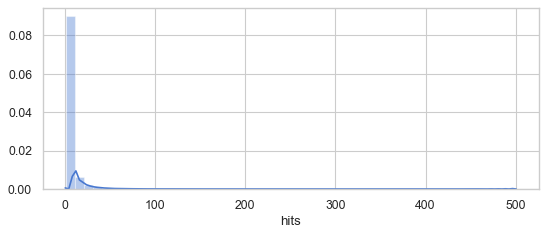

In [148]:
with sns.axes_style("whitegrid"):
    figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
    chart = sns.distplot(df['hits']);
    plt.show()

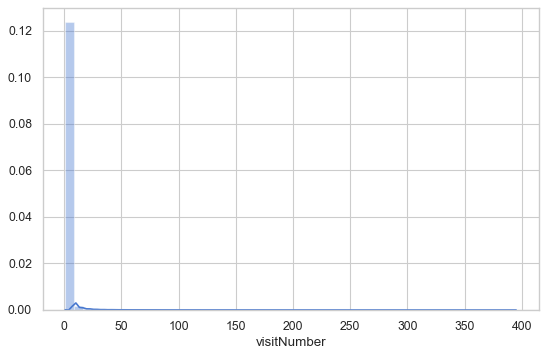

In [150]:
with sns.axes_style("whitegrid"):
    figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
    chart = sns.distplot(df['visitNumber']);
    plt.show()

In [109]:
from matplotlib.pyplot import figure
with sns.axes_style("whitegrid"):
    figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')
    chart = sns.countplot(y=col_names[0], palette="ch:.25", data=df);
    chart.set(xscale='log')
    plt.show()

In [141]:
from matplotlib.pyplot import figure
with sns.axes_style("whitegrid"):
    figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
    chart = sns.countplot(y='operatingSystem', palette="ch:.25", data=df);
    chart.set(xscale='log')
    plt.show()

In [113]:
from matplotlib.pyplot import figure
with sns.axes_style("whitegrid"):
    figure(num=None, figsize=(8, 50), dpi=80, facecolor='w', edgecolor='k')
    chart = sns.countplot(y=col_names[1], palette="ch:.25", data=df);
    chart.set(xscale='log')
    plt.show()

In [114]:
with sns.axes_style("whitegrid"):
    figure(num=None, figsize=(8, 60), dpi=80, facecolor='w', edgecolor='k')
    chart = sns.countplot(y=col_names[2], palette="ch:.25", data=df);
    chart.set(xscale='log')
    plt.show()

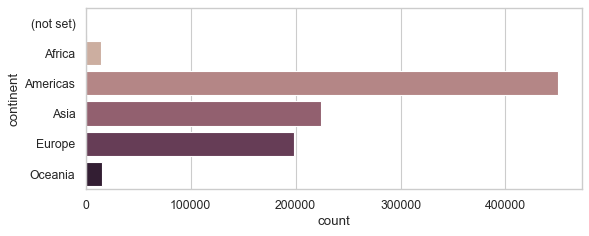

In [115]:
with sns.axes_style("whitegrid"):
    figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
    chart = sns.countplot(y='continent', palette="ch:.25", data=df);
    plt.show()

In [116]:
with sns.axes_style("whitegrid"):
    figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
    chart = sns.countplot(y='deviceCategory', palette="ch:.25", data=df);
    plt.show()

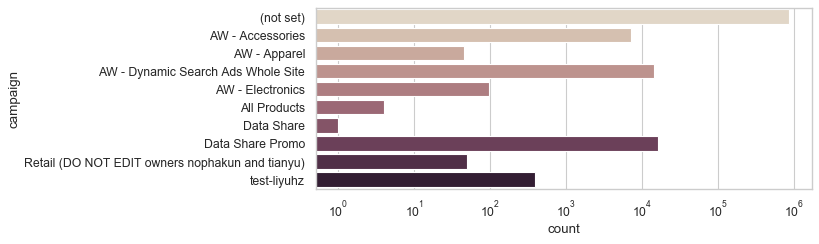

In [117]:
with sns.axes_style("whitegrid"):
    figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
    chart = sns.countplot(y='campaign', palette="ch:.25", data=df);
    chart.set(xscale='log')
    plt.show()

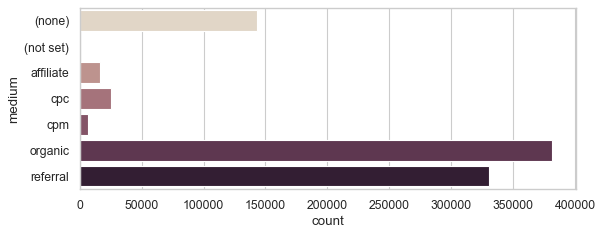

In [118]:
columns = ['channelGrouping', 'browser', 'deviceCategory', 'city', 'continent', 'country', 'networkDomain', 'campaign', 'keyword', 'medium', 'source']

with sns.axes_style("whitegrid"):
    figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
    chart = sns.countplot(y='medium', palette="ch:.25", data=df);
    # chart.set(xscale='log')
    plt.show()

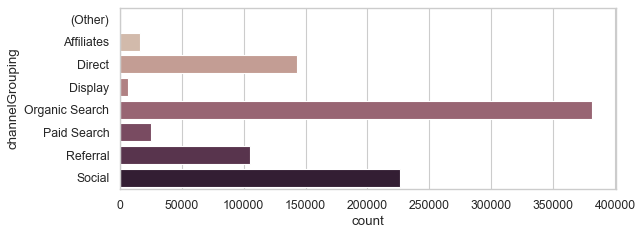

In [121]:
with sns.axes_style("whitegrid"):
    figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
    chart = sns.countplot(y='channelGrouping', palette="ch:.25", data=df);
    plt.show()

In [122]:
with sns.axes_style("whitegrid"):
    figure(num=None, figsize=(8, 100), dpi=100, facecolor='w', edgecolor='k')
    chart = sns.countplot(y='city', palette="ch:.25", data=df);
    chart.set(xscale='log')
    plt.show()